# FINAL PROJECT ON BITCOIN PRICE PREDICTION

### by Lenin Meher

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df1=pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')
df2=pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [3]:
df1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.shape

(3997697, 8)

In [5]:
df2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.shape

(2099760, 8)

# Treating missing values

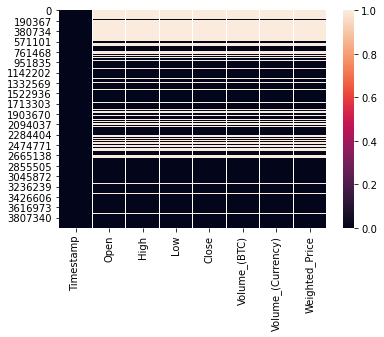

In [7]:
sns.heatmap(df1.isnull())

In [8]:
df1.isnull().sum()

Timestamp                  0
Open                 1231878
High                 1231878
Low                  1231878
Close                1231878
Volume_(BTC)         1231878
Volume_(Currency)    1231878
Weighted_Price       1231878
dtype: int64

In [7]:
#As we have a lot amount of data,we can drop timestamp having missing values
df1.dropna(axis=0,inplace=True)
df1.shape

(2765819, 8)

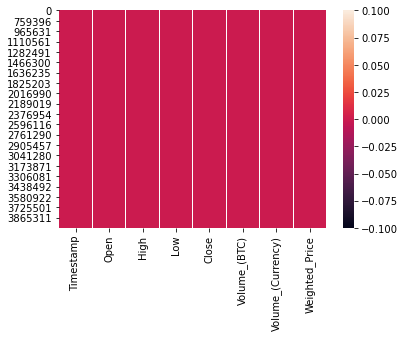

In [10]:
sns.heatmap(df1.isnull())

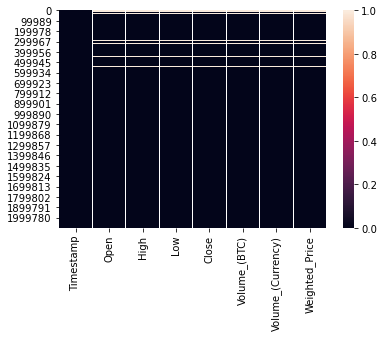

In [11]:
sns.heatmap(df2.isnull())

In [8]:
#As we have very few number of missing values as compared to the amount of dataset , we can drop them
df2.dropna(axis=0,inplace=True)

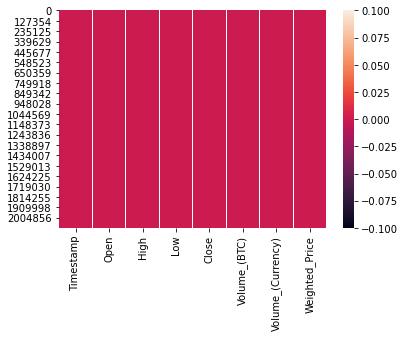

In [13]:
sns.heatmap(df2.isnull())

In [9]:
df2.shape

(1990691, 8)

# Joining of two dataframes

In [10]:
df=pd.concat([df1,df2])

In [11]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [12]:
df.shape

(4756510, 8)

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [15]:
df.shape

(4756510, 8)

In [16]:
data=df.copy()

In [21]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],unit='s')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756510 entries, 0 to 4756509
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 290.3 MB


# Detecting Outliers

In [24]:
outliers=[]
def detect_outliers(col):
    threshold=3
    mean=np.mean(col)
    std=np.std(col)
    for i in col:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers


In [25]:
outlier_WP=detect_outliers(df['Weighted_Price'])

In [26]:
len(outlier_WP)

73118

In [27]:
np.min(outlier_WP)

14437.17374

In [28]:
#Removing outliers from dataframe
df.loc[(df['Weighted_Price']>14438)]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1917280,2017-12-07 08:19:00,14410.54,14443.00,14400.67,14440.00,13.025853,188084.717380,14439.339380
1917281,2017-12-07 08:20:00,14440.00,14449.00,14440.00,14443.01,17.823407,257409.898350,14442.239081
1917282,2017-12-07 08:21:00,14443.01,14450.80,14440.00,14448.69,14.005336,202364.065580,14449.068892
1917283,2017-12-07 08:22:00,14448.69,14450.00,14445.00,14450.00,6.658740,96217.943460,14449.872981
1917284,2017-12-07 08:23:00,14450.00,14450.00,14446.00,14450.00,32.205237,465364.641250,14449.968078
...,...,...,...,...,...,...,...,...
4240851,2018-01-13 14:14:00,14455.91,14455.92,14455.91,14455.92,1.341004,19385.435360,14455.916188
4240852,2018-01-13 14:15:00,14455.92,14459.00,14455.92,14458.99,2.953403,42694.479614,14456.030388
4240853,2018-01-13 14:16:00,14459.00,14466.00,14459.00,14466.00,2.806821,40599.675891,14464.647384
4240854,2018-01-13 14:17:00,14466.00,14466.00,14465.98,14465.99,2.919566,42234.431200,14465.997276


In [29]:
df.drop((df[df['Weighted_Price']>14438].index),inplace=True)

In [30]:
df.shape

(4683412, 8)

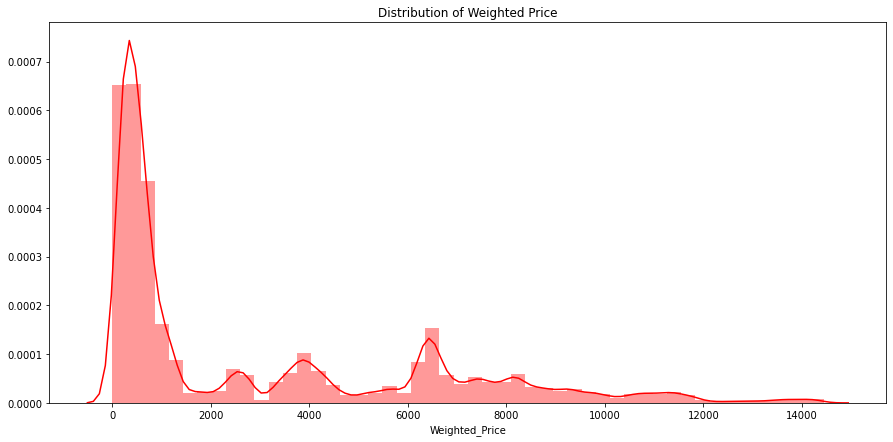

In [31]:
plt.figure(figsize=(15,7))
plt.title("Distribution of Weighted Price")
sns.distplot(df['Weighted_Price'],kde=True,color='red')

In [32]:
#As we can see no significant outliers are present

# EDA

As this is a large dataset, we can take out a random sample from it to perform EDA in it and see the results clearly without much time processing.

In [33]:
sample=df.sample(n=100)

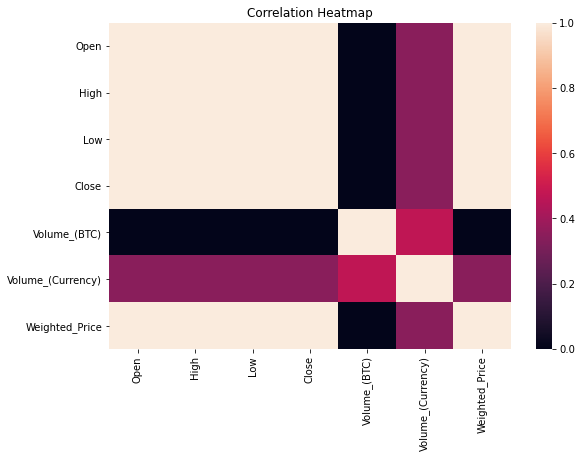

In [34]:
plt.figure(figsize=(9,6))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr())

The heatmap shows a strong positive correlation among weighted price,Open,High,Low and Close.

Volume(BTC) has zero correlation . so we can remove the column from dataframe to reduce complexity.

In [35]:
#dropping column
df.drop('Volume_(BTC)',axis=1,inplace=True)

In [36]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,6.879160,4.580000


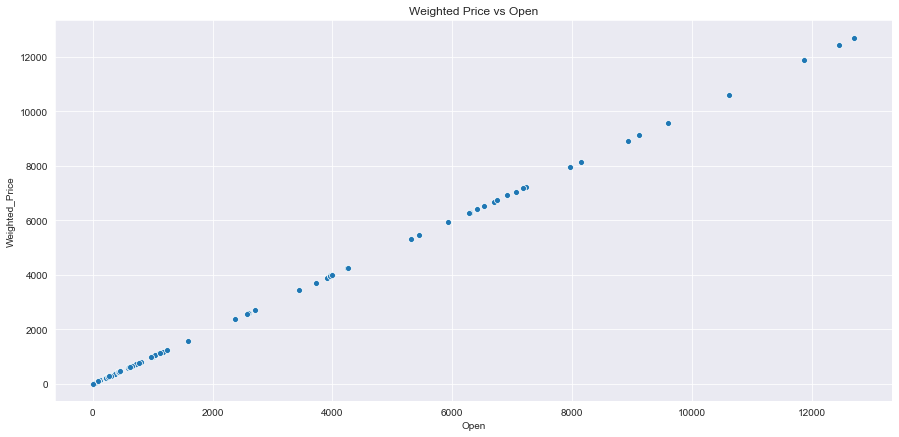

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.title('Weighted Price vs Open')
sns.scatterplot('Open','Weighted_Price',data=sample)

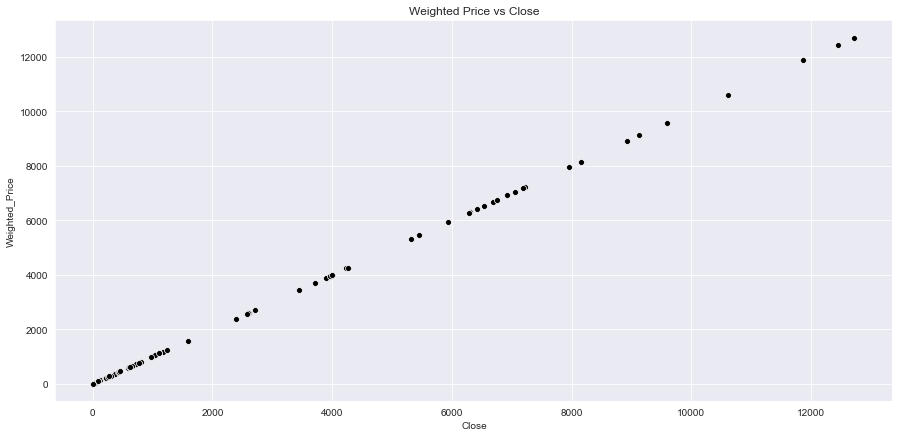

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.title('Weighted Price vs Close')
sns.scatterplot('Close','Weighted_Price',data=sample,color='black')

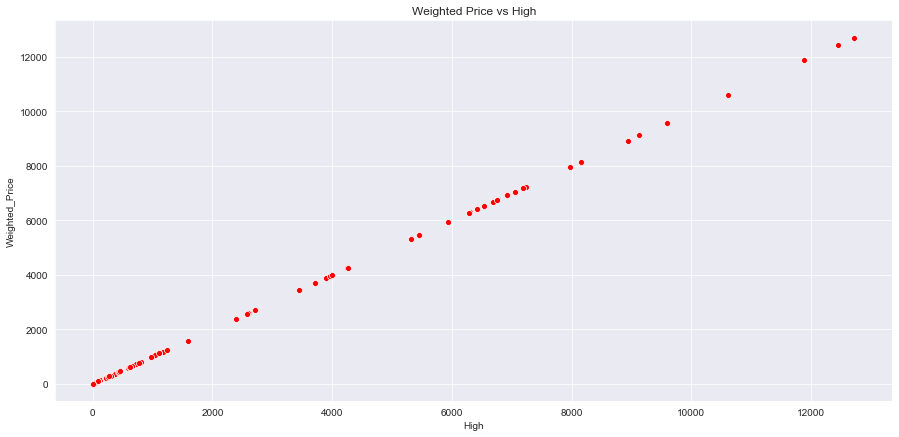

In [62]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.title('Weighted Price vs High')
sns.scatterplot('High','Weighted_Price',data=sample,color='red')

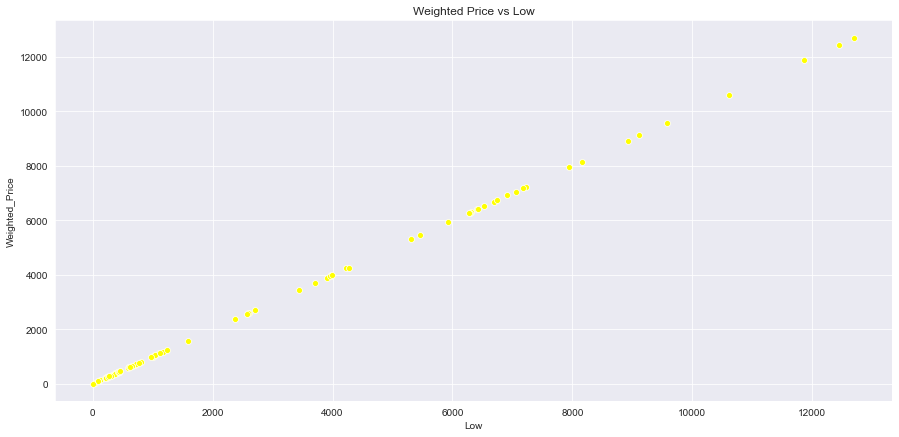

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.title('Weighted Price vs Low')
sns.scatterplot('Low','Weighted_Price',data=sample,color='yellow')

All of the above figure suggests a strong positive linear relationship between x and y , which the correlation matrix have also shown.

c:\python\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


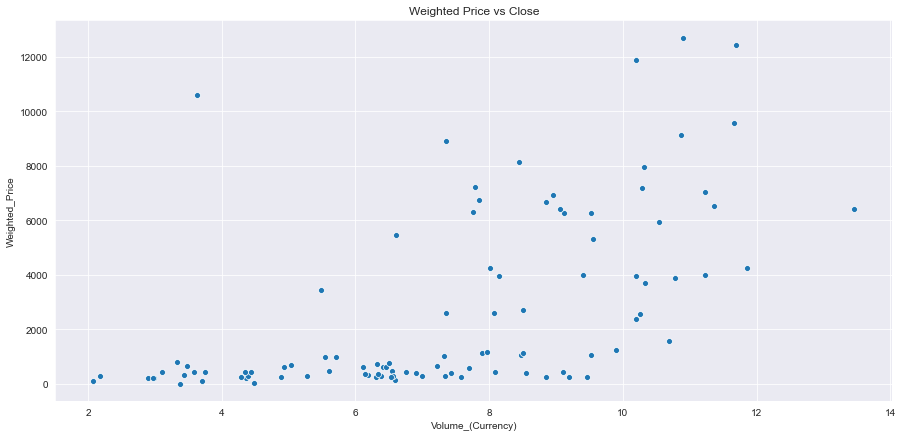

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.title('Weighted Price vs Close')
x=np.log(df['Volume_(Currency)'])
sns.scatterplot(x,'Weighted_Price',data=sample)

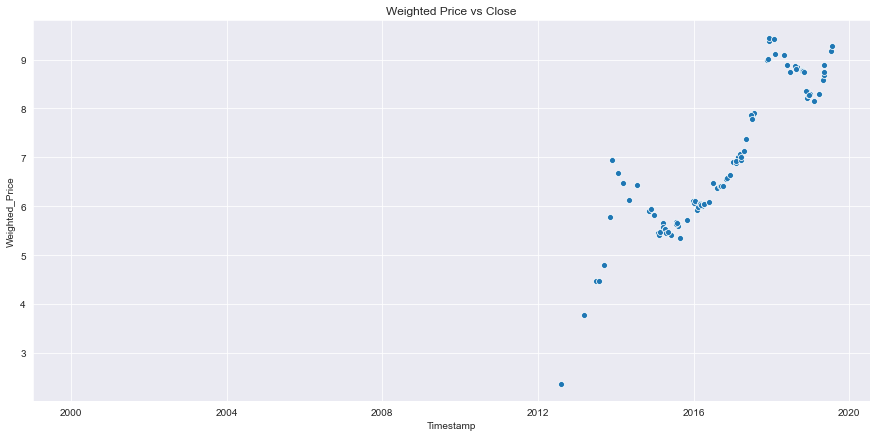

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.title('Weighted Price vs Close')
y=np.log(df['Weighted_Price'])
sns.scatterplot('Timestamp',y,data=sample)

The graph shows during 2019 the price of bitcoin has decreased but after that it gradually increased.

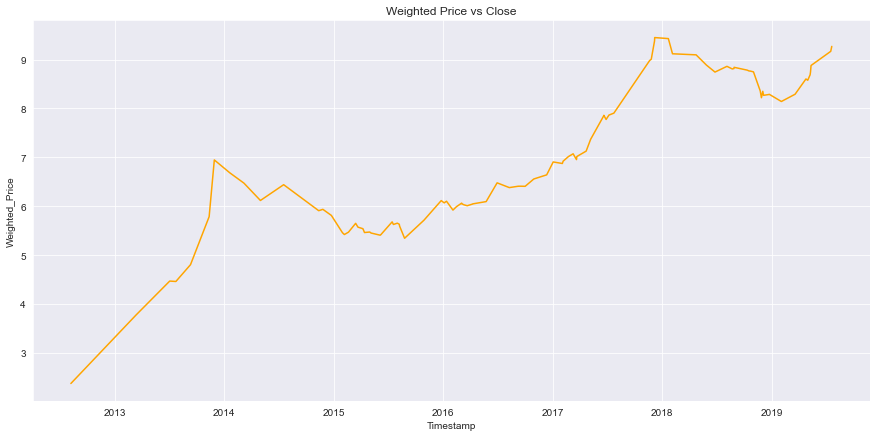

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.title('Weighted Price vs Close')
y=np.log(df['Weighted_Price'])
sns.lineplot('Timestamp',y,data=sample,color='orange')

Lets find the maximum and minimum price of bitcoin and its date.

In [58]:
df.loc[(df['Weighted_Price']==df['Weighted_Price'].max())]

,Timestamp,Open,High,Low,Close,Volume_(Currency),Weighted_Price
1970795,2018-01-13 13:35:00,14440.74,14443.49,14420.0,14430.33,49427.045356,14437.997949


In [59]:
df.loc[(df['Weighted_Price']==df['Weighted_Price'].min())]

,Timestamp,Open,High,Low,Close,Volume_(Currency),Weighted_Price
3849462,2017-04-15 23:02:00,0.06,0.06,0.06,0.06,0.046725,0.06


The difference between maximum and minimum price is very large which shows that it may be very risky decision to invest in it.

# Model Implementation

In [17]:
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [45]:
#Data Scaling

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

x=pd.DataFrame(sc.fit_transform(data[['Timestamp', 'Open', 'High', 'Low', 'Close',
       'Volume_(Currency)']]),columns=[['Timestamp', 'Open', 'High', 'Low', 'Close',
       'Volume_(Currency)']])

In [46]:
x.head()

,Timestamp,Open,High,Low,Close,Volume_(Currency)
0,0.000000,0.000218,0.000218,0.000218,0.000218,1.001464e-07
1,0.000119,0.000218,0.000218,0.000218,0.000218,1.055142e-05
2,0.000137,0.000223,0.000227,0.000223,0.000227,8.581561e-06
3,0.000137,0.000227,0.000227,0.000227,0.000227,2.064017e-06
4,0.000306,0.000227,0.000227,0.000227,0.000227,3.444615e-07


In [59]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [47]:
x=x
y=data.iloc[:,[7]]

In [48]:
#Splitting into train-test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [49]:
x_train.head()

,Timestamp,Open,High,Low,Close,Volume_(Currency)
421288,0.284532,0.028175,0.028272,0.028175,0.028175,0.000009
949292,0.466931,0.014047,0.014047,0.014047,0.014047,0.000040
2536825,0.941333,0.192466,0.192466,0.192466,0.192466,0.000014
783129,0.407729,0.011294,0.011294,0.011294,0.011294,0.000001
1269067,0.577905,0.022404,0.022404,0.022404,0.022404,0.000103


In [61]:
y_train
x_test
y_test

,Weighted_Price
2562532,3952.888843
1772715,4384.000000
3552786,607.318613
4411539,8299.684979
1576236,1076.500000
...,...
1775577,4389.997770
831630,248.336706
484914,440.200000
94298,111.840000


In [62]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [63]:
pred=LR.predict(x_test)

In [64]:
pred

array([[3952.77059432],
       [4384.03886724],
       [ 607.28014495],
       ...,
       [ 440.21841444],
       [ 111.87877952],
       [ 245.93668308]])

# Accuracy

In [65]:
from sklearn.metrics import r2_score

In [67]:
print('The accuracy is',r2_score(y_test,pred)*100,'%')

The accuracy is 99.99996257936934 %


In [68]:
LR.predict(sc.transform([[1325317920,4.39,4.39,4.39,4.39,2]]))

array([[4.46102609]])

# Thank You !